# Environment
```
python == 3.7.12
bs4 == 0.0.1
pandas == 1.1.5
matplotlib == 3.2.2
requests == 2.23.0
```

# Process of the project

## Mount to Google Driver

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/Int303_project1') 

## Import modules

In [3]:
import time
import random
from tqdm import tqdm
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

## Task1: Web scraping

1. set target and headers

In [ ]:
main_url = "https://maoyan.com/board/4"
single_headers = {
    'Cookie': '__mta=174454045.1635231280295.1635318590492.1635320472245.25; _lxsdk_s=17cc0956999-6d6-9d6-9c7%7C%7C20; Hm_lpvt_703e94591e87be68cc8da0da7cbd0be2=1635320472; Hm_lvt_703e94591e87be68cc8da0da7cbd0be2=1635246826,1635248014,1635261048,1635261075; __mta=174454045.1635231280295.1635235934618.1635262111887.10; _lx_utm=utm_source%3Dgoogle%26utm_medium%3Dorganic; _lxsdk=945091F0362911EC81688D3D6094E729EA995E6DA9A24BF085A356B9A8B607A6; _lxsdk_cuid=17cbb61273cc8-0888b646a02fc6-49193201-1aeaa0-17cbb61273cc8; _csrf=076f14c974ff9a872b7a26cd4f5cc98c99a5909066a2df18cf2896f1de8b7c3d; uuid=945091F0362911EC81688D3D6094E729EA995E6DA9A24BF085A356B9A8B607A6; uuid_n_v=v1',
    'Accept-Encoding': 'gzip, deflate, br',
    'Host': 'maoyan.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15',
    'Accept-Language': 'zh-cn',
    'Referer': 'https://maoyan.com/board/4',
    'Connection': 'keep-alive',
}

main_headers = {
    'Cookie': '__mta=174454045.1635231280295.1635242618122.1635257843786.14; _lxsdk_s=17cbcf66c1b-593-dee-e3b%7C%7C3; Hm_lpvt_703e94591e87be68cc8da0da7cbd0be2=1635257842; Hm_lvt_703e94591e87be68cc8da0da7cbd0be2=1635235933,1635239054,1635246826,1635248014; _lx_utm=utm_source%3Dgoogle%26utm_medium%3Dorganic; __mta=174454045.1635231280295.1635235235827.1635235934618.9; _lxsdk=945091F0362911EC81688D3D6094E729EA995E6DA9A24BF085A356B9A8B607A6; _lxsdk_cuid=17cbb61273cc8-0888b646a02fc6-49193201-1aeaa0-17cbb61273cc8; _csrf=076f14c974ff9a872b7a26cd4f5cc98c99a5909066a2df18cf2896f1de8b7c3d; uuid=945091F0362911EC81688D3D6094E729EA995E6DA9A24BF085A356B9A8B607A6; uuid_n_v=v1',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate, br',
    'Host': 'maoyan.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15',
    'Accept-Language': 'zh-cn',
    'Referer': 'https://maoyan.com/board/4',
    'Connection': 'keep-alive'
}

2. Pre-define Several methods

In [ ]:
#  get score of every 10 movies per page
def get_movies_score(url, headers):
  soup = getAndParseURL(url, headers)
  first = [i.text for i in soup.findAll("i", class_="integer")]
  second = [i.text for i in soup.findAll("i", class_="fraction")]
  assert len(first)==len(second)
  scores = [first[i]+second[i] for i in range(len(first))]
  scores = [float(i) for i in scores]
  return scores

In [ ]:
# get soup from the url
# If the request is blocked by the website, the programme will print out the url of verification page and will sleep for 5s to re-request the site again.
# input: target url, requiring header(dict)
# output: the soup of the web
def getAndParseURL(url, headers):
  # headers =  {
  #     'User-Agent':  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15',
  #     'Cookie': '__mta=174454045.1635231280295.1635232758890.1635234938733.7; _lxsdk_s=17cbb61273d-f99-710-326%7C%7C18; Hm_lpvt_703e94591e87be68cc8da0da7cbd0be2=1635234937; Hm_lvt_703e94591e87be68cc8da0da7cbd0be2=1635231278; _lxsdk=945091F0362911EC81688D3D6094E729EA995E6DA9A24BF085A356B9A8B607A6; _lxsdk_cuid=17cbb61273cc8-0888b646a02fc6-49193201-1aeaa0-17cbb61273cc8; _csrf=076f14c974ff9a872b7a26cd4f5cc98c99a5909066a2df18cf2896f1de8b7c3d; uuid=945091F0362911EC81688D3D6094E729EA995E6DA9A24BF085A356B9A8B607A6; uuid_n_v=v1'
  # }
  # set time sleep to prevent verification
  time.sleep(random.random()*3)
  result = requests.get(url, headers=headers)
  if (result.url != url):
    print('Real website: %s \n Need to be verified in: %s'% (url, result.url))
    print('Automatically sleep for 5s and try this attemp again!')
    time.sleep(5)
    return getAndParseURL(url, headers)
  if result.status_code != 200:
    print("WARNING:\n %s get response %d, program exit!"%(url, result.status_code))
    exit()
  # exchange coding
  result.encoding = 'utf-8'
  soup = BeautifulSoup(result.text, 'html.parser')
  return soup

In [ ]:
# get all the urls of the movies
# return:
#    main_page_products_urls: url list of every movie
#    movies_scores: score list of every movie
def get_urls_list():
  main_page_products_urls  = []
  movies_scores = []
  for i in range(0,100,10):
    main_url = "https://maoyan.com/board/4?offset="+str(i)
    soup = getAndParseURL(main_url, main_headers)
    # get href of each movie
    main_page_products_urls.extend([x.a.get("href") for x in soup.findAll("p", class_="name")])
    # get score of each movie 
    movies_scores.extend(get_movies_score(main_url, main_headers))
  assert (len(main_page_products_urls) == 100)
  main_page_products_urls = ["https://maoyan.com" + i for i in main_page_products_urls ]
  return main_page_products_urls, movies_scores

In [ ]:
# get info of single movie
# input: url of every single movie url
# return: all the info of the movie
def get_single_info(url):
  soup = getAndParseURL(url, single_headers)
  # name
  name = soup.find("h1", class_ = "name").text.strip()
  # genres
  genres = [i.text.strip() for i in soup.findAll("a", class_ = "text-link")]
  # place, duration and time  
  place_length = soup.findAll("li", class_ = "ellipsis")[1].text.split('/')
  place = place_length[0].strip()
  duration = place_length[1].strip()
  screen_time = re.findall("\d+-\d+-\d+", soup.findAll("li", class_ = "ellipsis")[2].text)
  # director
  directors_list = [i.text.strip() for i in soup.find("ul", class_ = "celebrity-list clearfix").findAll("a", class_ ="name")]
  # actors
  actors_list = [i.find("a", class_ ="name").text.strip() for i in soup.find("div", class_="tab-celebrity tab-content") .findAll("li", class_ = "celebrity actor")]
  # award_num
  try:
    awards_num = int(soup.find("div",class_ ="honors-name").text[:-1])
    named_num = int(soup.findAll("div",class_ ="honors-name")[2].text[:-1])
  except:
    awards_num = None
    named_num = None
    print("\nmovie %s has no award information." % name)
  # income
  try:
    total_income =  int(soup.findAll("div",class_ ="mbox-name")[-2].text)
    first_week_income =  int(soup.findAll("div",class_ ="mbox-name")[-4].text)
  except:
    first_week_income = None
    total_income =  None
    print("\nmovie %s has no incoming information." % name)
  return name, genres, place, duration, screen_time, directors_list, actors_list, awards_num, named_num, first_week_income, total_income

3. get all the url and score of every movie

In [ ]:
# get all the url and score of every movie
main_page_products_urls, movies_scores = get_urls_list()

In [ ]:
print(main_page_products_urls[:5])
print(movies_scores[:5])

['https://maoyan.com/films/1200486', 'https://maoyan.com/films/1297', 'https://maoyan.com/films/1206605', 'https://maoyan.com/films/1292', 'https://maoyan.com/films/1211270']
[9.6, 9.5, 9.5, 9.3, 9.6]


4. call the method to get all the information of every movie one by one\
When running, the re-request may not make sense, you **don‘t** have to stop the programe. \
Just **click into the returnned url and do the Manual authentication**, the programe will work again.

In [ ]:
movie_frame = pd.DataFrame(columns=('Rank', 'Title', 'Name of director', 'Name of actors', 'Rating', 'Cumulative income', 'Duration', 'Type', 'Screen place', 'Screen time', 
                                    'Awards num', 'Nomination Award num', 'First-week income'))
for i in tqdm(range(len(main_page_products_urls)), desc='Getting the movie'):
  # get info from every single movie
  name, genres, place, duration, screen_time, directors_list, actors_list, awards_num, named_num, first_week_income, total_income = get_single_info(main_page_products_urls[i])
  # add every single info to the dataframe
  movie_frame = movie_frame.append([{'Rank': i+1,
                                    'Title': name, 
                                    'Name of director': ','.join(directors_list),
                                    'Name of actors': ','.join(actors_list),  
                                    'Rating': movies_scores[i], 
                                    'Cumulative income': total_income, 
                                    'First-week income': first_week_income,
                                    'Duration': duration, 
                                    'Type': ','.join(genres),
                                    'Screen place': place,
                                    'Screen time': screen_time[0], 
                                    'Awards num': awards_num,
                                    'Nomination Award num': named_num}])
assert len(movie_frame)==100
# set index
# movie_frame.set_index('Rank')
# save to csv
movie_frame.to_csv("Yilin.Liu_1822203.csv", index=False)

Getting the movie:   1%|          | 1/100 [00:02<04:20,  2.63s/it]

Real website: https://maoyan.com/films/1297 
 Need to be verified in: https://verify.maoyan.com/verify?requestCode=12e0afd61c0bd7021eea249f461948e62qc3w&redirectURL=https%3A%2F%2Fmaoyan.com%2Ffilms%2F1297
Automatically sleep for 5s and try this attemp again!
Real website: https://maoyan.com/films/1297 
 Need to be verified in: https://verify.maoyan.com/verify?requestCode=0ee383f913541c988f8cbd2760bc2f4bzafoc&redirectURL=https%3A%2F%2Fmaoyan.com%2Ffilms%2F1297
Automatically sleep for 5s and try this attemp again!
Real website: https://maoyan.com/films/1297 
 Need to be verified in: https://verify.maoyan.com/verify?requestCode=5aac7daa300d0bc802a671390a12ac21uy21t&redirectURL=https%3A%2F%2Fmaoyan.com%2Ffilms%2F1297
Automatically sleep for 5s and try this attemp again!
Real website: https://maoyan.com/films/1297 
 Need to be verified in: https://verify.maoyan.com/verify?requestCode=280cc2131a3a9497a8dd70ea469214d2qx4e1&redirectURL=https%3A%2F%2Fmaoyan.com%2Ffilms%2F1297
Automatically slee

Getting the movie:   2%|▏         | 2/100 [03:58<3:48:49, 140.09s/it]


movie 肖申克的救赎 has no incoming information.


Getting the movie:   6%|▌         | 6/100 [04:10<34:20, 21.92s/it]


movie 霸王别姬 has no incoming information.


Getting the movie:   9%|▉         | 9/100 [04:19<13:20,  8.79s/it]


movie 这个杀手不太冷 has no incoming information.


Getting the movie:  10%|█         | 10/100 [04:24<11:26,  7.63s/it]


movie 盗梦空间 has no incoming information.


Getting the movie:  11%|█         | 11/100 [04:27<09:21,  6.31s/it]


movie 阿甘正传 has no incoming information.


Getting the movie:  14%|█▍        | 14/100 [04:36<06:05,  4.25s/it]


movie 楚门的世界 has no incoming information.


Getting the movie:  15%|█▌        | 15/100 [04:38<05:00,  3.53s/it]


movie 触不可及 has no incoming information.


Getting the movie:  16%|█▌        | 16/100 [04:42<05:03,  3.61s/it]


movie 辛德勒的名单 has no incoming information.


Getting the movie:  17%|█▋        | 17/100 [04:43<04:02,  2.92s/it]


movie 情书 has no incoming information.


Getting the movie:  19%|█▉        | 19/100 [04:47<03:08,  2.32s/it]


movie 摔跤吧！爸爸 has no award information.


Getting the movie:  22%|██▏       | 22/100 [04:54<03:06,  2.39s/it]


movie 小丑 has no incoming information.


Getting the movie:  23%|██▎       | 23/100 [04:56<02:44,  2.14s/it]


movie 忠犬八公的故事 has no award information.

movie 忠犬八公的故事 has no incoming information.


Getting the movie:  24%|██▍       | 24/100 [04:58<02:57,  2.33s/it]


movie 怦然心动 has no award information.

movie 怦然心动 has no incoming information.


Getting the movie:  27%|██▋       | 27/100 [05:06<03:06,  2.56s/it]


movie 当幸福来敲门 has no incoming information.


Getting the movie:  30%|███       | 30/100 [05:13<02:37,  2.25s/it]


movie 熔炉 has no incoming information.


Getting the movie:  31%|███       | 31/100 [05:16<03:00,  2.62s/it]


movie 放牛班的春天 has no incoming information.


Getting the movie:  33%|███▎      | 33/100 [05:23<03:19,  2.97s/it]


movie 看不见的客人 has no award information.


Getting the movie:  34%|███▍      | 34/100 [05:25<03:02,  2.77s/it]


movie 教父 has no incoming information.


Getting the movie:  36%|███▌      | 36/100 [05:27<02:04,  1.95s/it]


movie 被嫌弃的松子的一生 has no incoming information.


Getting the movie:  37%|███▋      | 37/100 [05:30<02:18,  2.20s/it]


movie 活着 has no incoming information.


Getting the movie:  39%|███▉      | 39/100 [05:35<02:19,  2.29s/it]


movie 请以你的名字呼唤我 has no incoming information.


Getting the movie:  40%|████      | 40/100 [05:37<02:11,  2.19s/it]


movie 死亡诗社 has no incoming information.


Getting the movie:  41%|████      | 41/100 [05:39<02:10,  2.21s/it]


movie 闻香识女人 has no incoming information.


Getting the movie:  43%|████▎     | 43/100 [05:46<02:34,  2.71s/it]


movie 机器人总动员 has no incoming information.


Getting the movie:  45%|████▌     | 45/100 [05:52<02:40,  2.91s/it]


movie 末代皇帝 has no incoming information.


Getting the movie:  46%|████▌     | 46/100 [05:55<02:48,  3.12s/it]


movie 西西里的美丽传说 has no incoming information.


Getting the movie:  48%|████▊     | 48/100 [05:59<02:14,  2.58s/it]


movie 让子弹飞 has no incoming information.


Getting the movie:  49%|████▉     | 49/100 [06:02<02:07,  2.50s/it]


movie 本杰明·巴顿奇事 has no incoming information.


Getting the movie:  50%|█████     | 50/100 [06:05<02:19,  2.78s/it]


movie 搏击俱乐部 has no incoming information.


Getting the movie:  51%|█████     | 51/100 [06:07<01:57,  2.39s/it]


movie 阿凡达 has no incoming information.


Getting the movie:  52%|█████▏    | 52/100 [06:11<02:15,  2.82s/it]


movie 美国往事 has no incoming information.


Getting the movie:  53%|█████▎    | 53/100 [06:14<02:16,  2.91s/it]


movie 窃听风暴 has no incoming information.


Getting the movie:  54%|█████▍    | 54/100 [06:17<02:19,  3.04s/it]


movie 飞屋环游记 has no incoming information.


Getting the movie:  55%|█████▌    | 55/100 [06:21<02:30,  3.34s/it]


movie 天使爱美丽 has no incoming information.


Getting the movie:  56%|█████▌    | 56/100 [06:24<02:25,  3.30s/it]


movie 乱世佳人 has no incoming information.


Getting the movie:  57%|█████▋    | 57/100 [06:25<01:49,  2.55s/it]


movie 飞越疯人院 has no incoming information.


Getting the movie:  58%|█████▊    | 58/100 [06:28<01:55,  2.74s/it]


movie 一一 has no incoming information.


Getting the movie:  59%|█████▉    | 59/100 [06:30<01:38,  2.41s/it]


movie 美丽心灵 has no incoming information.


Getting the movie:  60%|██████    | 60/100 [06:33<01:41,  2.54s/it]


movie 消失的爱人 has no incoming information.


Getting the movie:  61%|██████    | 61/100 [06:34<01:27,  2.25s/it]


movie 布达佩斯大饭店 has no incoming information.


Getting the movie:  64%|██████▍   | 64/100 [06:41<01:23,  2.31s/it]


movie 超脱 has no incoming information.


Getting the movie:  65%|██████▌   | 65/100 [06:42<01:07,  1.92s/it]


movie 爱在黎明破晓前 has no incoming information.


Getting the movie:  66%|██████▌   | 66/100 [06:44<01:07,  1.98s/it]


movie 海蒂和爷爷 has no award information.


Getting the movie:  67%|██████▋   | 67/100 [06:46<01:07,  2.05s/it]


movie 蝴蝶效应 has no incoming information.


Getting the movie:  68%|██████▊   | 68/100 [06:49<01:07,  2.11s/it]


movie 罗马假日 has no incoming information.


Getting the movie:  69%|██████▉   | 69/100 [06:52<01:17,  2.50s/it]


movie 低俗小说 has no incoming information.


Getting the movie:  71%|███████   | 71/100 [06:58<01:17,  2.68s/it]


movie 釜山行 has no incoming information.


Getting the movie:  72%|███████▏  | 72/100 [07:00<01:10,  2.51s/it]


movie 七宗罪 has no incoming information.


Getting the movie:  73%|███████▎  | 73/100 [07:03<01:12,  2.67s/it]


movie 春光乍泄 has no incoming information.


Getting the movie:  74%|███████▍  | 74/100 [07:10<01:42,  3.94s/it]


movie 无间道 has no incoming information.


Getting the movie:  75%|███████▌  | 75/100 [07:13<01:35,  3.81s/it]


movie 爱在日落黄昏时 has no incoming information.


Getting the movie:  76%|███████▌  | 76/100 [07:16<01:21,  3.40s/it]


movie 穿条纹睡衣的男孩 has no incoming information.


Getting the movie:  77%|███████▋  | 77/100 [07:19<01:18,  3.41s/it]


movie 心灵捕手 has no incoming information.


Getting the movie:  78%|███████▊  | 78/100 [07:21<01:04,  2.95s/it]


movie 重庆森林 has no incoming information.


Getting the movie:  79%|███████▉  | 79/100 [07:22<00:48,  2.33s/it]


movie 剪刀手爱德华 has no incoming information.


Getting the movie:  80%|████████  | 80/100 [07:23<00:41,  2.06s/it]


movie 辩护人 has no incoming information.


Getting the movie:  81%|████████  | 81/100 [07:26<00:42,  2.23s/it]


movie 控方证人 has no incoming information.


Getting the movie:  82%|████████▏ | 82/100 [07:28<00:38,  2.12s/it]


movie 素媛 has no incoming information.


Getting the movie:  84%|████████▍ | 84/100 [07:34<00:42,  2.64s/it]


movie 时空恋旅人 has no incoming information.


Getting the movie:  85%|████████▌ | 85/100 [07:36<00:37,  2.52s/it]


movie 断背山 has no incoming information.


Getting the movie:  86%|████████▌ | 86/100 [07:37<00:28,  2.05s/it]


movie 天空之城 has no award information.

movie 天空之城 has no incoming information.


Getting the movie:  87%|████████▋ | 87/100 [07:38<00:22,  1.76s/it]


movie 十二怒汉 has no incoming information.


Getting the movie:  88%|████████▊ | 88/100 [07:42<00:27,  2.30s/it]


movie 两杆大烟枪 has no incoming information.


Getting the movie:  89%|████████▉ | 89/100 [07:44<00:25,  2.30s/it]


movie 蝙蝠侠：黑暗骑士 has no incoming information.


Getting the movie:  90%|█████████ | 90/100 [07:48<00:28,  2.86s/it]


movie 猫鼠游戏 has no incoming information.


Getting the movie:  92%|█████████▏| 92/100 [07:52<00:19,  2.43s/it]


movie 真爱至上 has no incoming information.


Getting the movie:  94%|█████████▍| 94/100 [07:56<00:12,  2.12s/it]


movie 大鱼 has no incoming information.


Getting the movie:  95%|█████████▌| 95/100 [07:58<00:10,  2.17s/it]


movie 钢琴家 has no incoming information.


Getting the movie:  96%|█████████▌| 96/100 [08:02<00:09,  2.48s/it]


movie 饮食男女 has no incoming information.


Getting the movie:  98%|█████████▊| 98/100 [08:10<00:06,  3.34s/it]


movie 致命魔术 has no incoming information.


Getting the movie: 100%|██████████| 100/100 [08:14<00:00,  4.94s/it]


movie 禁闭岛 has no incoming information.


In [ ]:
print(movie_frame.sort_values('Rank').head())

        Title Name of director  ... Nomination Award num  First-week income
Rank                            ...                                        
1       我不是药神              文牧野  ...                 24.0           123812.0
2      肖申克的救赎         弗兰克·德拉邦特  ...                 16.0                NaN
3         绿皮书           彼得·法雷里  ...                 36.0            11502.0
4       海上钢琴师         朱塞佩·托纳多雷  ...                  5.0             6351.0
5     哪吒之魔童降世               饺子  ...                 10.0            66507.0

[5 rows x 12 columns]


## Task2: Draw the figures

Set Chinese display

The shell order will show the path of the downloaded file, you should copy and stick it to the `fname` variable.

In [ ]:
# downloads ttf to support chinese
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2021-11-02 10:20:31--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  22.5MB/s    in 0.4s    

2021-11-02 10:20:32 (22.5 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [ ]:
# set chinese ttf
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
# to display negative signs
plt.rcParams['axes.unicode_minus'] = False 

### 2. Draw the figure of counts on the score（bar） and num intervals（hist）

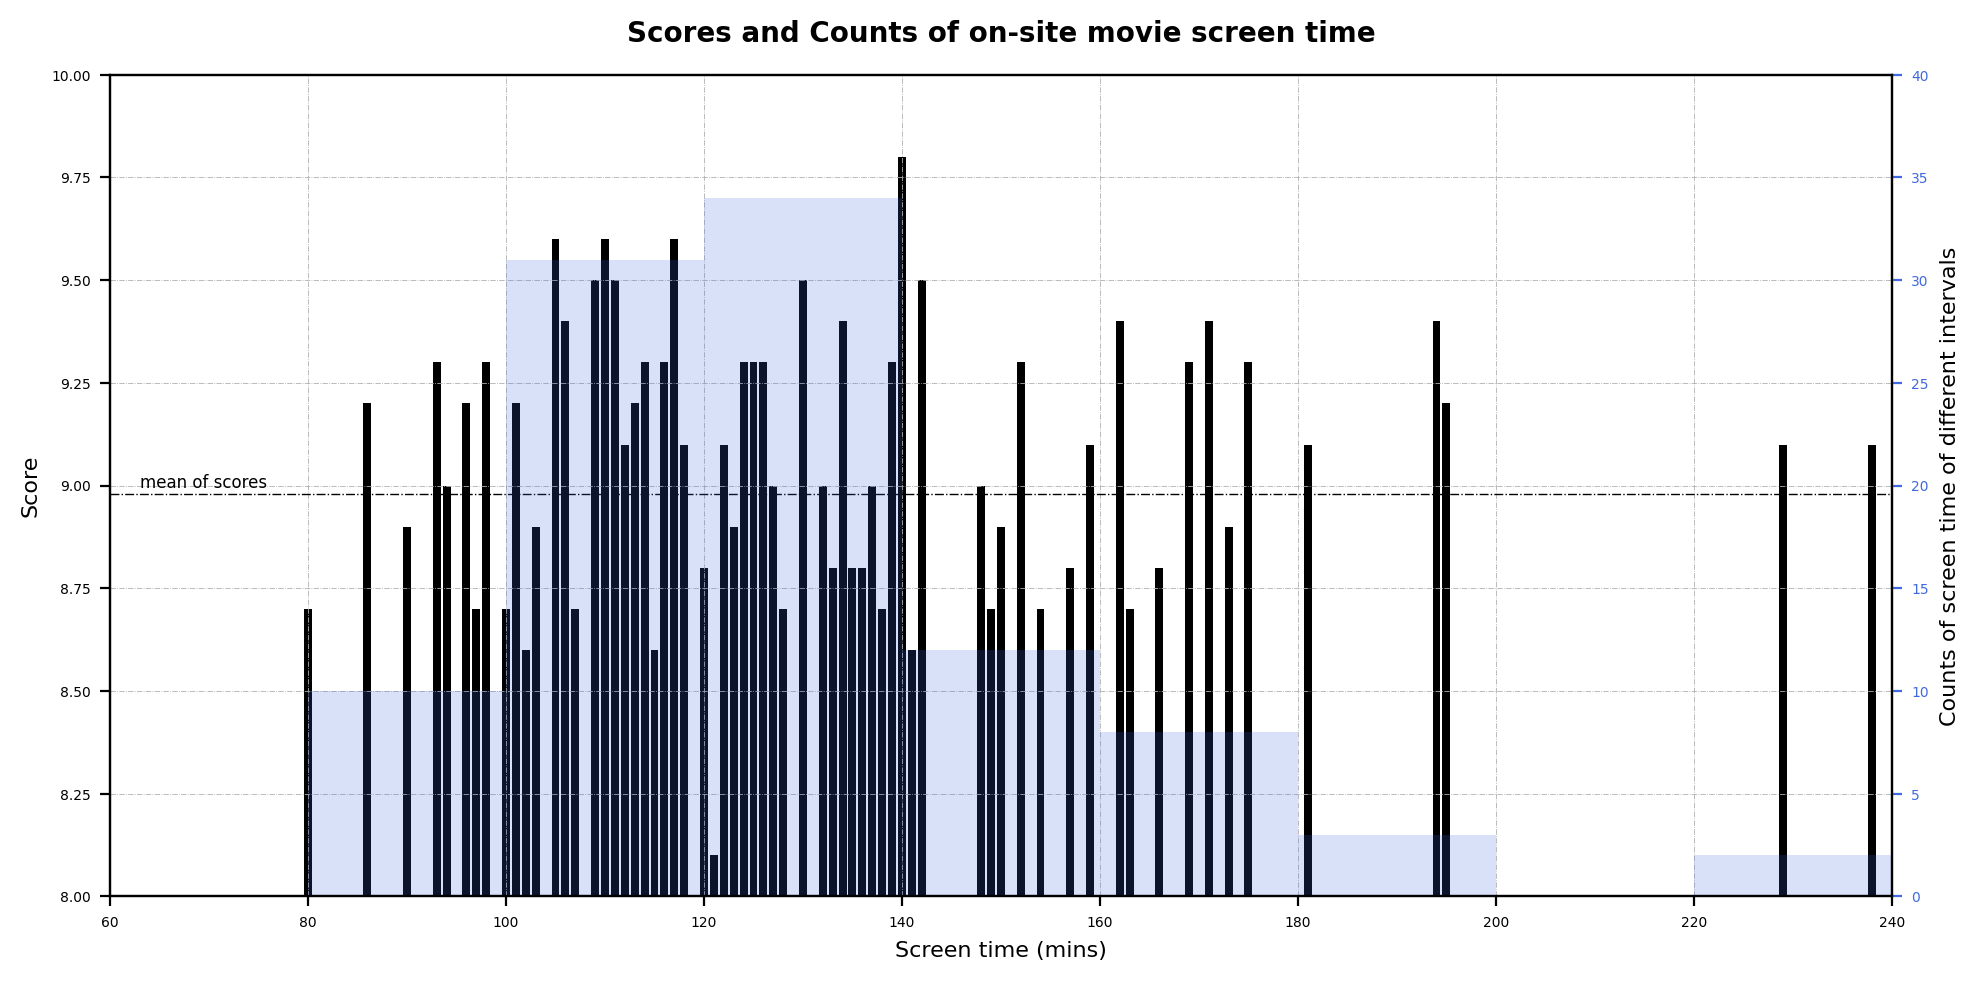

In [5]:
movie_frame = pd.read_csv("Yilin.Liu_1822203.csv", index_col=0,)
# get all the Durations data
movie_frame['Duration'] = [ int(i[:-2]) for i in movie_frame['Duration'] ]

# set father figure
fig, ax1 = plt.subplots(dpi=200, figsize=(10, 5))
plt.title("Scores and Counts of on-site movie screen time", fontsize=10, fontdict={'weight':'heavy'}, y=1.02)
plt.xlim(60, 240)
plt.xlabel('Screen time (mins)', fontsize=8)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

# Plot the duration 
ax1.bar( movie_frame['Duration'] , movie_frame['Rating'], lw=0.5, label="Score", color='black')
mean_of_rate = movie_frame['Rating'].mean()
ax1.axhline(y=mean_of_rate, color="black", label="mean", ls="-.", lw=0.5)
movie_frame = movie_frame.sort_values('Duration')
ax1.set_ylabel('Score', fontsize=8, color='black')
ax1.set_ylim(8, 10)
ax1.grid(linestyle='-.', linewidth = "0.3")
ax1.text(63, 8.995, "mean of scores" , fontsize=6)

# plot the Counts hist
ax2 = ax1.twinx()
ax2.hist(movie_frame['Duration'], bins=range(60, 260, 20), rwidth=1, range=(70,240), alpha = 0.2, color='royalblue')
ax2.tick_params(axis='y' ,labelsize=5, colors='royalblue')
ax2.set_ylabel('Counts of screen time of different intervals', fontsize=8)
ax2.set_ylim(0, 40)

plt.tight_layout()
# plt.show()
plt.savefig("counts on screen time.png")

### 3. Draw the figure of income counts

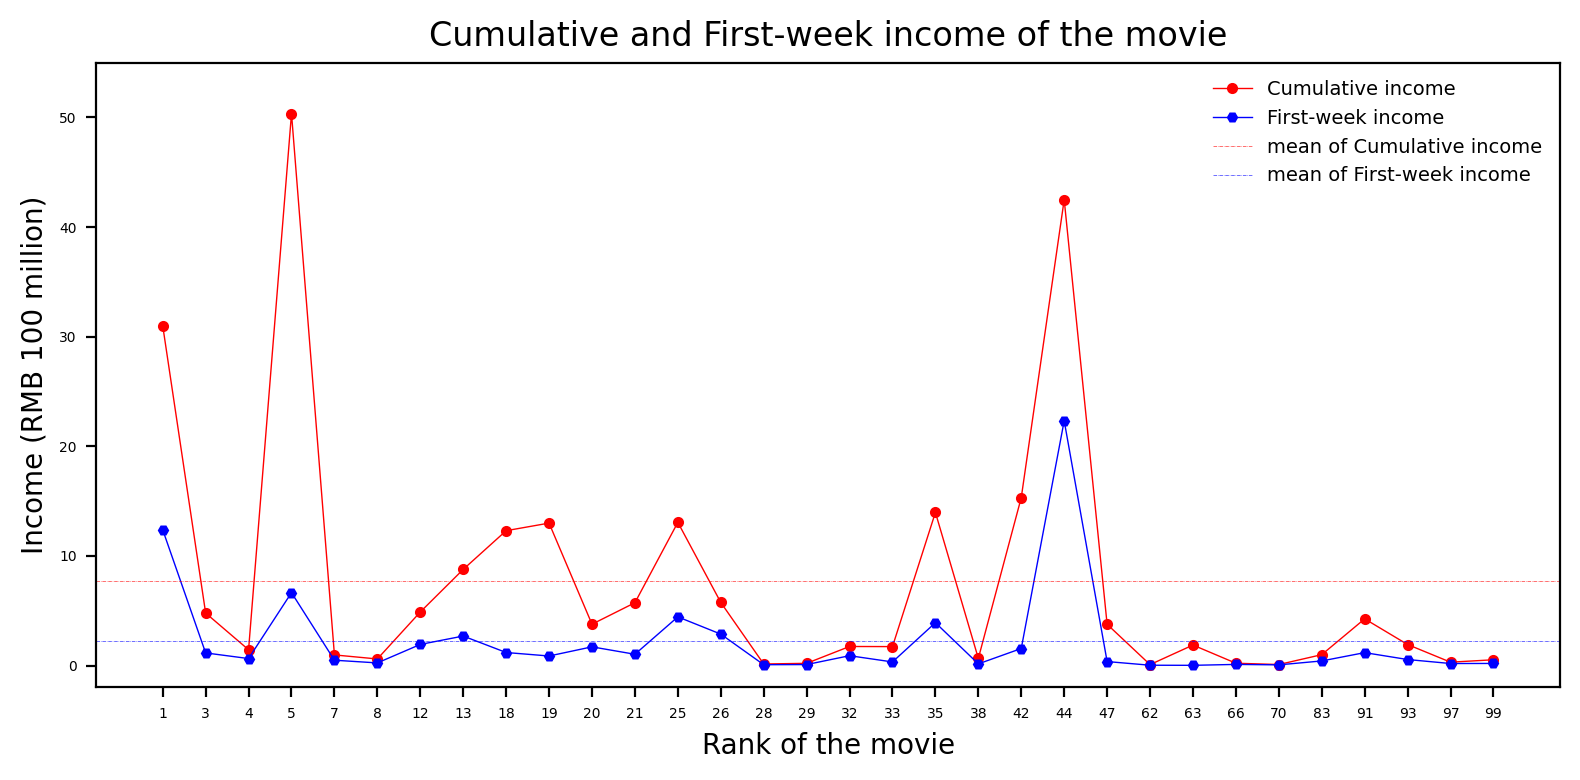

In [6]:
# get data
movie_income = movie_frame.sort_values('Rank')
movie_income = movie_income[movie_income['First-week income'].notnull()]
plt.figure(dpi=200, figsize=(8,4))

# plot two lines
a = plt.plot([str(i) for i in movie_income.index.values],  movie_income['Cumulative income'].values/10000, 'r-o', lw=0.5, ms=3)
b = plt.plot([str(i) for i in movie_income.index.values],  movie_income['First-week income'].values/10000, 'b-H', lw=0.5, ms=3)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.ylim(-2, 55)
plt.ylabel("Income (RMB 100 million)")
plt.xlabel("Rank of the movie")

# add mean axhiles 
plt.axhline(y=movie_income['Cumulative income'].mean()/10000, label="ll", color="r", ls="-.", lw=0.2)
plt.axhline(y=movie_income['First-week income'].mean()/10000, color="b",label="ll1", ls="-.", lw=0.2)
plt.title("Cumulative and First-week income of the movie")

# set legend
plt.legend(labels=['Cumulative income','First-week income','mean of Cumulative income', 'mean of First-week income'], fontsize=7, loc='best', frameon=False)

# show and save
plt.tight_layout()
# plt.show()
plt.savefig("income counts.png")

### 4. Draw the figure of Screen time (year and month)

In [ ]:
get_year =  movie_frame["Screen time"].map(lambda i : i.split('-')[0])
get_month = movie_frame["Screen time"].map(lambda i : i.split('-')[1])

sort_year_counts =  get_year.value_counts().sort_index(ascending=True)
sort_month_counts =  get_month.value_counts().sort_index(ascending=True)

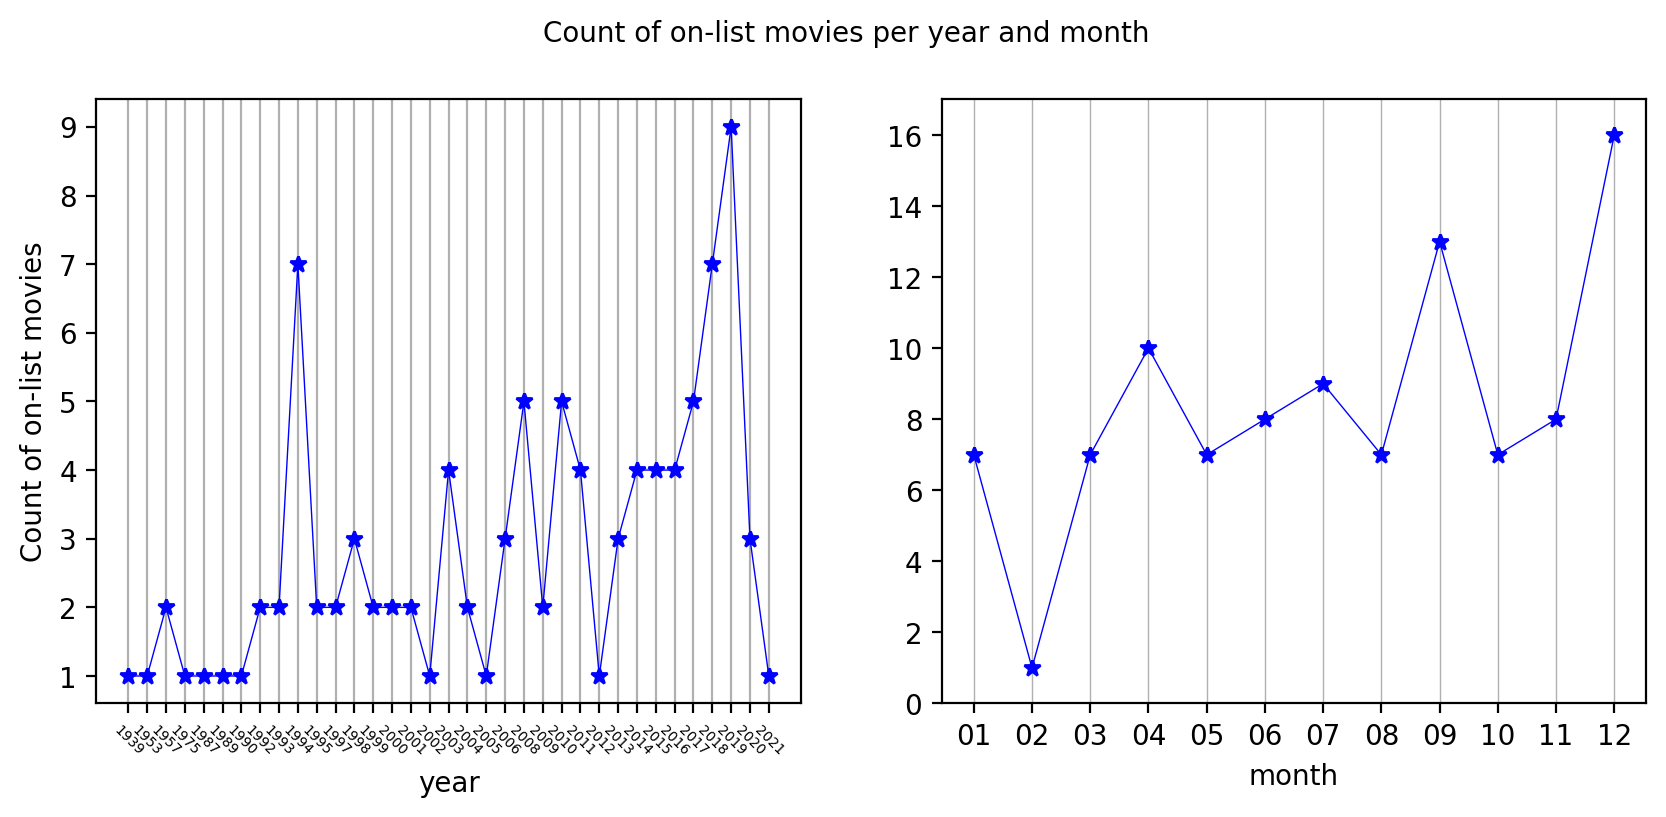

In [ ]:
plt.figure(dpi=200, figsize=(10,4))

plt.suptitle("Count of on-list movies per year and month", fontsize=10)
# plot 1: per year
plt.subplot(1, 2, 1)
plt.plot(sort_year_counts.index, sort_year_counts.values, 'b*-', lw=0.5)
plt.xlabel("year", fontsize=10)
plt.ylabel("Count of on-list movies", fontsize=10)
plt.xticks(rotation=-45, fontsize=5)
plt.grid(axis='x')

# plot 2: per month
plt.subplot(1, 2, 2)
plt.plot(sort_month_counts.index, sort_month_counts.values, 'b*-', lw=0.5)
plt.xlabel("month", fontsize=10)
plt.grid(axis='x', linewidth = "0.5")
plt.ylim(0, 17)

# plt.show()
plt.savefig("year_month_count.png")

### 5. Draw the figure of movie type count

In [ ]:
# get data: split
type_lists = movie_frame['Type'].map(lambda list: list.split(','))
all_type = []
for i in type_lists.values:
  all_type.extend(i)
all_type = pd.Series(all_type)
all_type = all_type.value_counts()

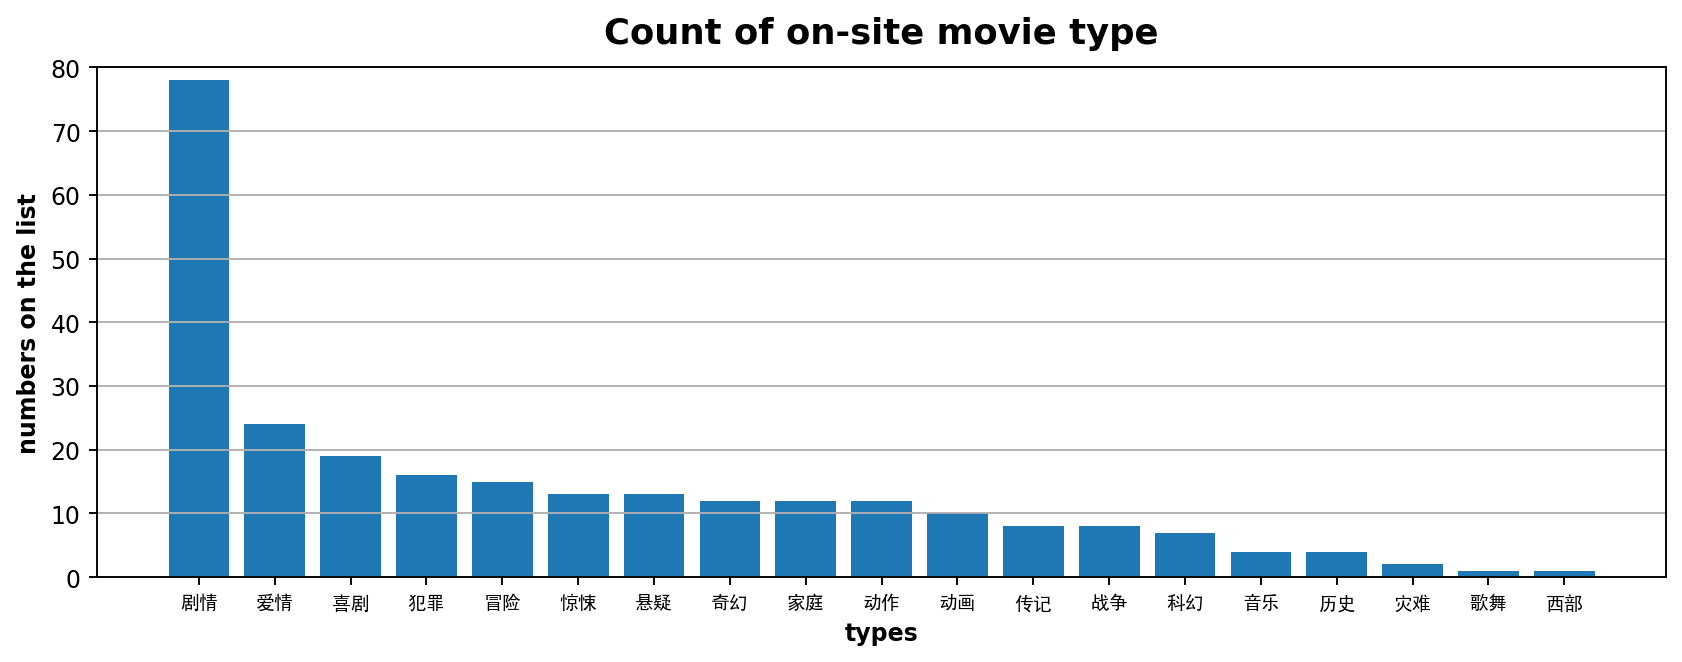

In [ ]:
# plot the bar
plt.figure(dpi=170, figsize=(10,4))
plt.bar(all_type.index, all_type.values)
plt.title("Count of on-site movie type", fontsize=15, fontdict={'weight':'heavy'}, y=1.02)
plt.xlabel('types', fontsize=10, fontdict={'weight':'heavy'})
plt.xticks(fontproperties=zhfont, fontsize=8)
plt.ylabel('numbers on the list', fontsize=10, fontdict={'weight':'heavy'})
plt.ylim(0,80)
plt.grid(axis='y')
plt.tight_layout()
# plt.show()
plt.savefig("typecount_bar.png")

### 6. Draw the figure of screen locations

In [ ]:
# get data
# the usual seperator is ','
# but because of official workers' carelessness, there is a '，'
# so using re.split()
place_lists = movie_frame['Screen place'].map(lambda i: re.split('[,，]', i))
all_place = []
for i in place_lists.values:
  all_place.extend(i)
all_place = pd.Series(all_place)
all_place = all_place.value_counts()

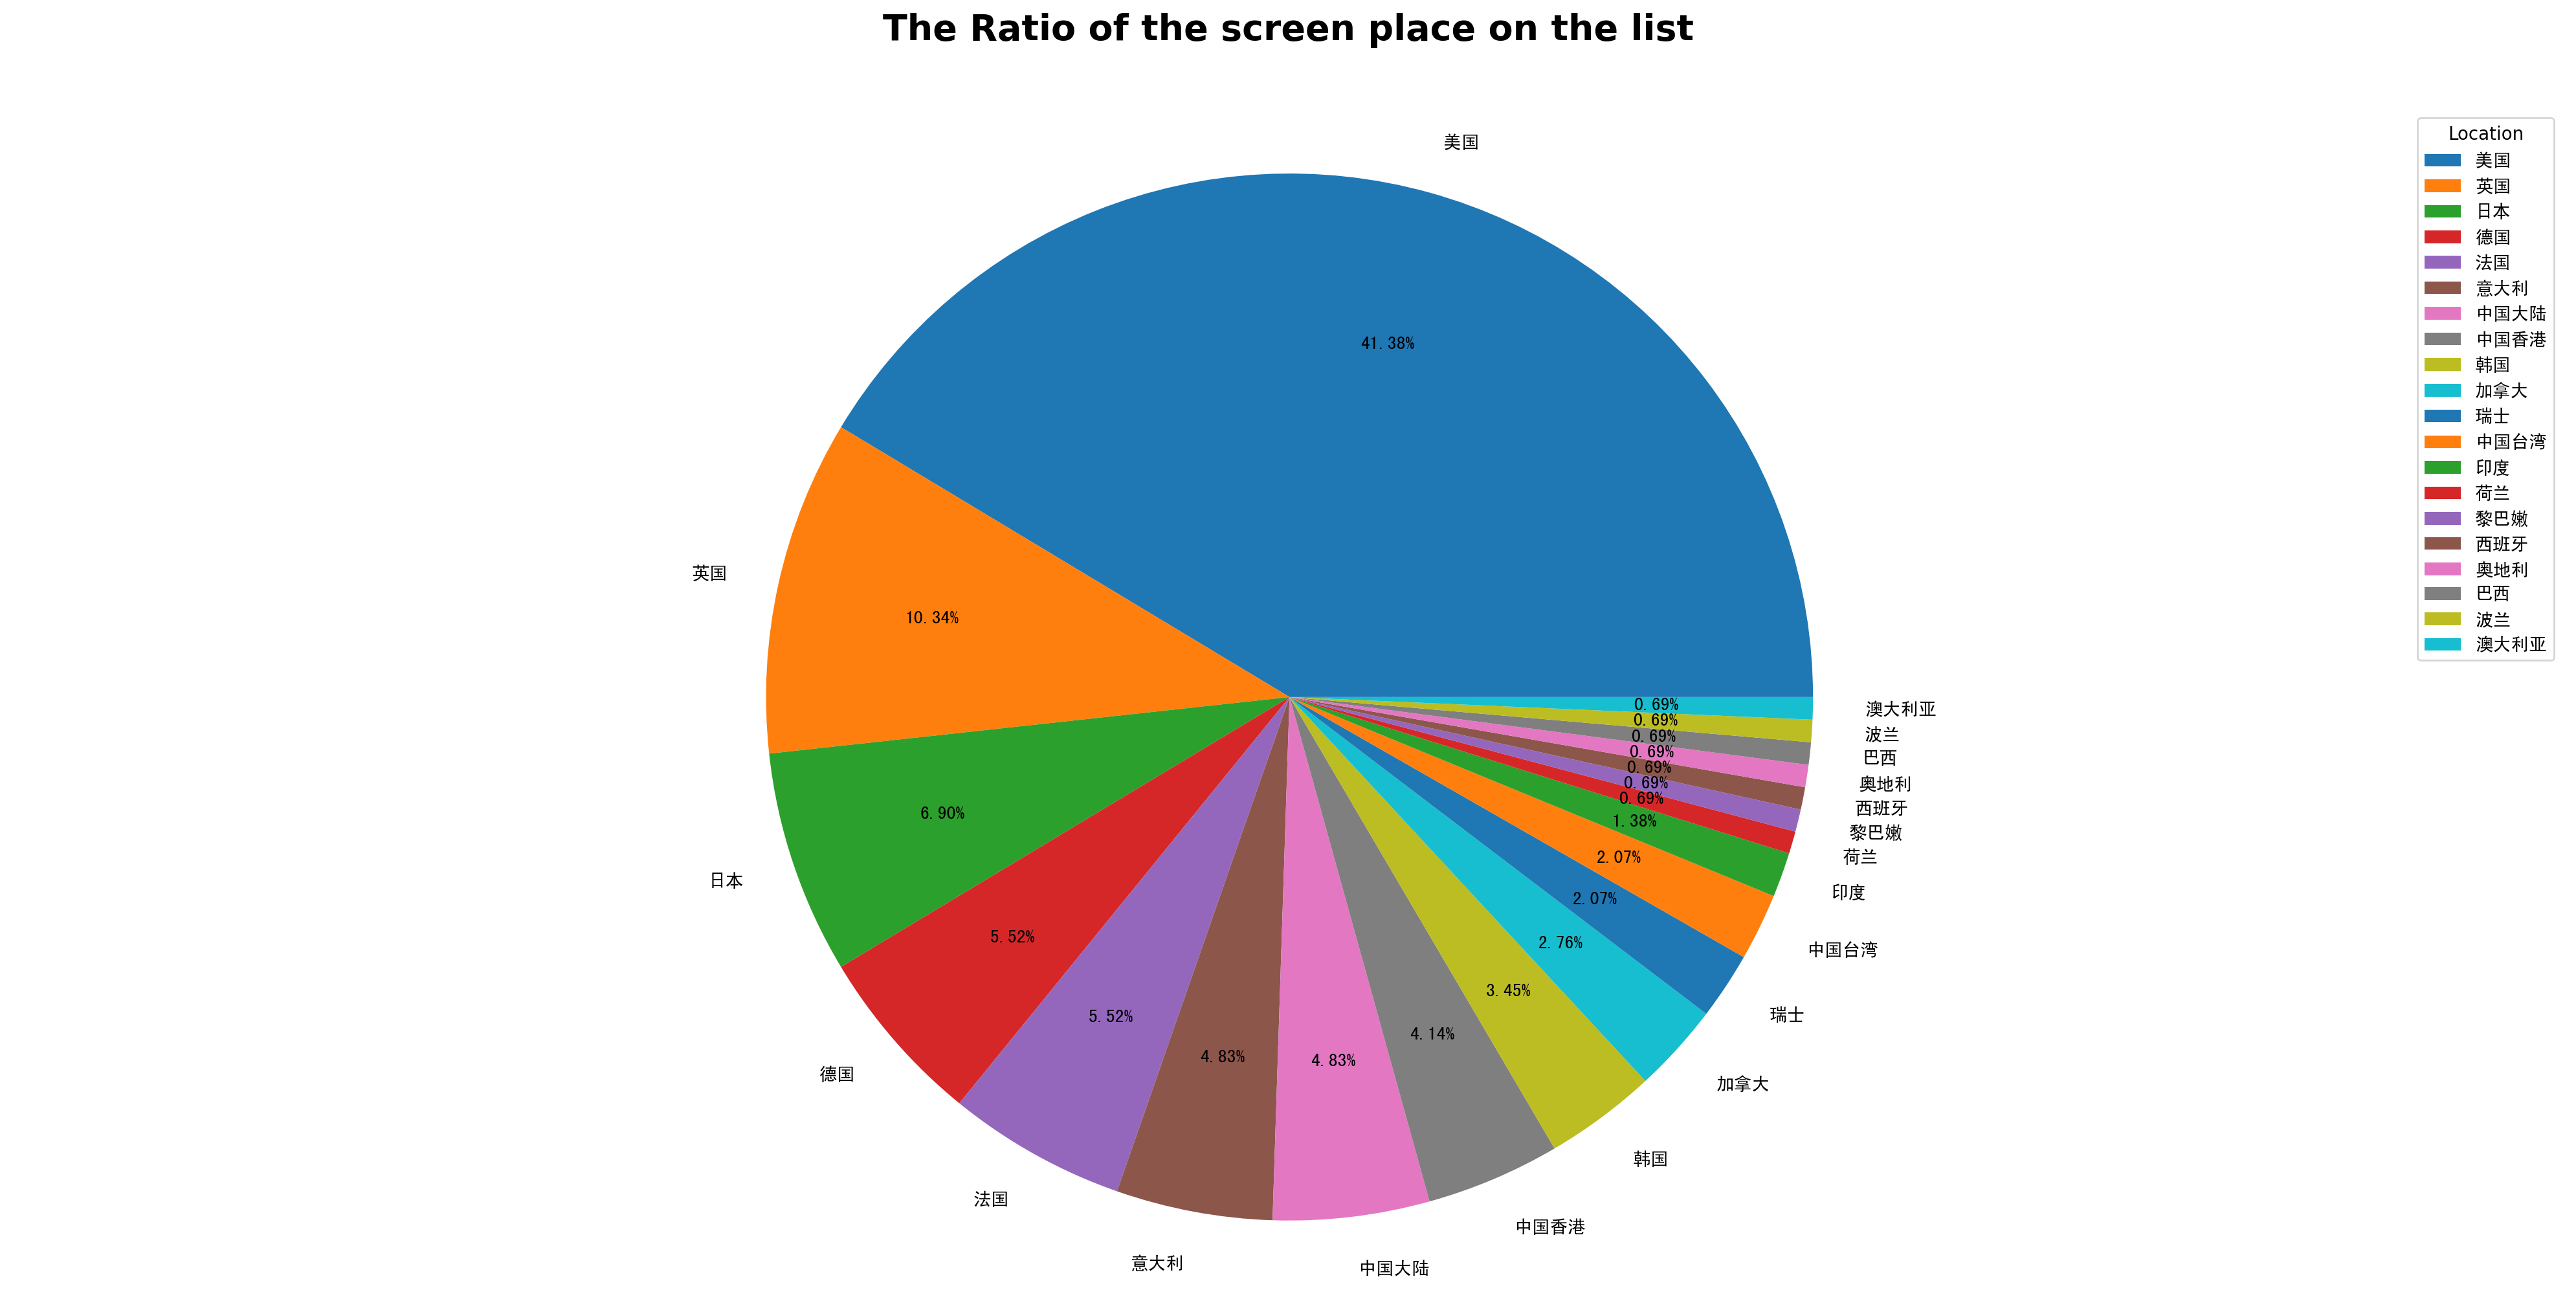

In [ ]:
plt.figure(dpi=200, figsize=(20,10))
patches,in_text,out_text = plt.pie(all_place.values, 
                                  labels=all_place.index, 
                                  autopct='%1.2f%%', 
                                  pctdistance = 0.7, 
                                  labeldistance = 1.1, 
                                  #  textprops = 10,
                                  # explode = [0.2 for i in range(len(all_place))]
                                  )

for t in in_text:
    t.set_size(1)
    t.set_fontweight('light')
    t.set_fontproperties(zhfont)
for t in out_text:
    t.set_size(1)
    t.set_fontproperties(zhfont)

plt.legend(
          fontsize=5,
          title="Location",
          loc="best",
            prop=zhfont
)
plt.title(u"The Ratio of the screen place on the list", 
          # fontproperties=zhfont, 
          fontsize=20, 
          fontdict={'weight':'heavy'},
          y = 1.05)
# make round 
plt.axis('equal')
# plt.show()
plt.tight_layout()
plt.savefig("place_count_pie.png")